In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import sklearn.metrics as metrics
import sklearn.tree as tree
import warnings
warnings.filterwarnings('ignore')

In [8]:
a=pd.read_csv('/content/Crop_recommendation.csv')

In [9]:
a.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
a.describe

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [12]:
a.shape

(2200, 8)

In [13]:
a['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object>

In [14]:
a['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
a['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object>

<Axes: >

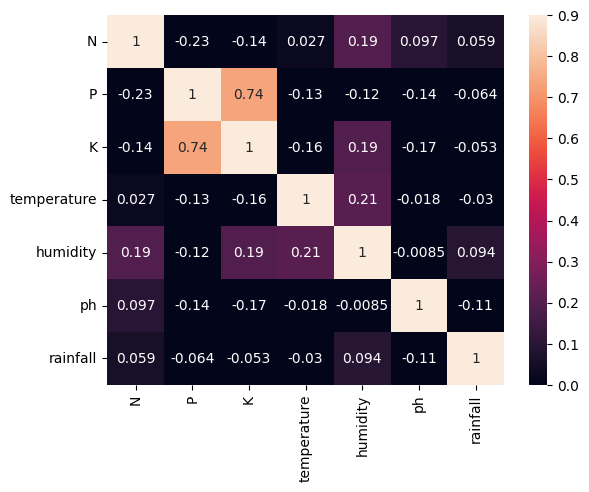

In [16]:
sns.heatmap(a.corr(),annot=True,vmin=0,vmax=0.9)

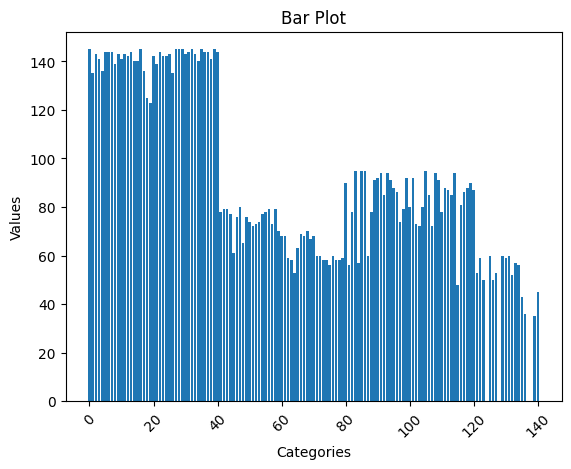

In [17]:
plt.bar(a['N'], a['P'])
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

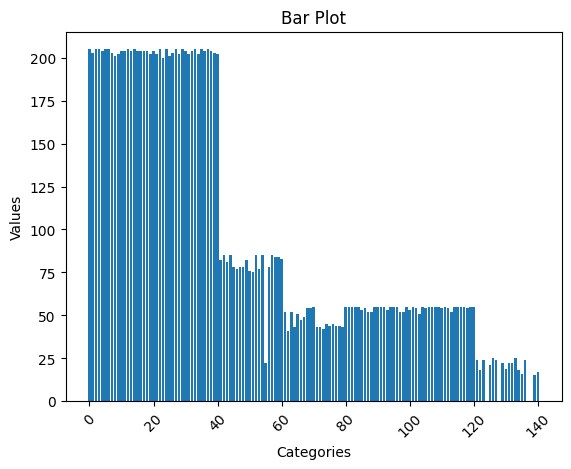

In [18]:
plt.bar(a['N'], a['K'])
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [19]:
features = a[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = a['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = a['label']
acc = []
model = []

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [22]:
from sklearn.model_selection import cross_val_score


In [23]:
e = cross_val_score(DecisionTree, features, target,cv=5)
e


array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [24]:
import pickle
DT_pkl_filename = '/content/decisiontree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [25]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [26]:
t = cross_val_score(NaiveBayes,features,target,cv=10)
t


array([1.        , 0.99545455, 1.        , 0.99090909, 0.99090909,
       1.        , 0.99090909, 1.        , 0.98636364, 0.99545455])

In [27]:
import pickle
NB_pkl_filename = '/content/naviebayes.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)

X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [29]:
q = cross_val_score(SVM,features,target,cv=10)
q

array([0.98181818, 0.97272727, 0.99090909, 0.97727273, 0.98636364,
       0.98636364, 0.98636364, 0.98181818, 0.97727273, 0.98181818])

In [30]:
import pickle
SVM_pkl_filename = '/content/svm.pkl'
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

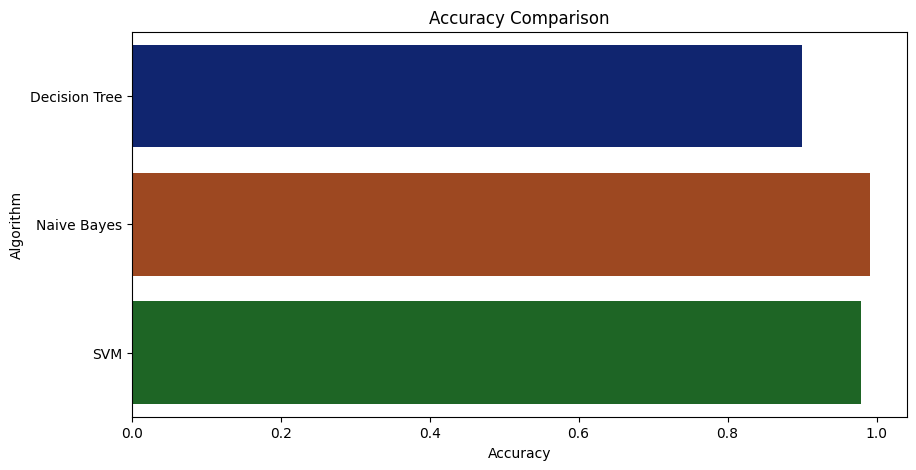

In [31]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [32]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, v)

Decision Tree 0.9
Naive Bayes 0.990909090909091
SVM 0.9795454545454545


In [33]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
pred = NaiveBayes.predict(data)
pred
print(pred)

['coffee']


In [34]:
data = np.array([[50,42,43,20.82,85,6.5,202]])
pred = NaiveBayes.predict(data)
print(pred)

['rice']


In [35]:
data = np.array([[42
,67
,77
,18.99424448
,15.9362937
,7.114405288
,78.69707199]])
pred = NaiveBayes.predict(data)
print(pred)

['chickpea']


In [36]:
data = np.array([[13,103,53,44.82,40,18.1,100]])
pred = NaiveBayes.predict(data)
print(pred)

['mothbeans']


In [37]:
data = np.array([[40,50,30,52.22,28,14.8,80]])
pred = NaiveBayes.predict(data)
print(pred)

['pigeonpeas']
